# Nick Chen

# Milestone 2

## Research question/interests

We intend to investigate the demand of global fish and seafood production via wild capturing and the affect it had on climate change by looking at how it affects the sustainable fish stocks. Does the wild fish stock will ever fulfilled the increasing demand resulted by the evergrowing global population? What will be the prediction of the wild fish stock if overfishing still exists for the next decade?

We also want to shift our perspective by looking at how technologies like aquaculture and seafood farming will help alleviate the impact of overfishing. Comparing country and region in terms of the extent of overfishing and their levels of overexploited fisheries to analyze and their production trend.

In [1]:
# Importing the dataset

import numpy as np
import pandas as pd

aquaculture = pd.read_csv("../data/raw/aquaculture-farmed-fish-production.csv", sep=",")
capturedVsAquaculture= pd.read_csv("../data/raw/capture-fisheries-vs-aquaculture.csv", sep=",")
captured = pd.read_csv("../data/raw/capture-fishery-production.csv", sep=",")
seafoodConsumptionpercapita = pd.read_csv("../data/raw/fish-and-seafood-consumption-per-capita.csv", sep=",")
sustainableFishStocks = pd.read_csv("../data/raw/fish-stocks-within-sustainable-levels.csv", sep=",")
globalFisheryBySector = pd.read_csv("../data/raw/global-fishery-catch-by-sector.csv", sep=",")
seafoodProduction = pd.read_csv("../data/raw/seafood-and-fish-production-thousand-tonnes.csv", sep=",")

captured.head()


,Entity,Code,Year,Capture fisheries production (metric tons)
0,Afghanistan,AFG,1960,200.0
1,Afghanistan,AFG,1961,300.0
2,Afghanistan,AFG,1962,300.0
3,Afghanistan,AFG,1963,300.0
4,Afghanistan,AFG,1964,300.0


# MileStone 3

## Task 1: Exploratory Data Analysis

Importing the EDA Code template

Credit: https://gist.github.com/jiahao87/c97214065f996b76ab8fe4ca1964b2b5##

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings

### Preliminary Data Processing


Import the dataframe __*'sustainableFishStocks'*__  --> A particular aspect that I want to focus on as it's most relevant to climate change and the state of resources

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/fish-stocks-within-sustainable-levels.csv", sep=",")

First, we can check to shape of the dataframe in terms of rows and columns to get a general picture of the Fish stocks

In [4]:
df.shape  # total 51 rows and 5 columns

(51, 5)

We can also get a preview of the data using __.head()__

In [5]:
df.head()

,Entity,Code,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited
0,Eastern Central Atlantic,NaN,2015,57.142860,42.857140
1,Eastern Central Atlantic,NaN,2017,57.142857,42.857143
2,Eastern Central Pacific,NaN,2015,86.666670,13.333330
3,Eastern Central Pacific,NaN,2017,86.666667,13.333333
4,Eastern Indian Ocean,NaN,2015,73.076920,26.923080


In [6]:
# using .columns to check what variable is embedded in the dataset
df.columns

Index(['Entity', 'Code', 'Year',
       'Share of fish stocks within biologically sustainable levels (FAO, 2020)',
       'Share of fish stocks that are overexploited'],
      dtype='object')

In [7]:
# returns the number of unique values for each variable.
df.nunique(axis=0)

Entity                                                                     16
Code                                                                        1
Year                                                                       21
Share of fish stocks within biologically sustainable levels (FAO, 2020)    51
Share of fish stocks that are overexploited                                51
dtype: int64

In [8]:
df.describe()

,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited
count,51.000000,51.000000,51.000000
mean,2007.705882,70.521579,29.478421
std,13.150352,13.885635,13.885635
min,1974.000000,37.500000,8.536585
25%,2002.000000,66.257862,18.156843
50%,2015.000000,73.076920,26.923080
75%,2017.000000,81.843157,33.742138
max,2017.000000,91.463415,62.500000


We can check which regions the dataset investigates by checking the entities

In [9]:
df.Entity.unique()                 

array(['Eastern Central Atlantic', 'Eastern Central Pacific',
       'Eastern Indian Ocean', 'Mediterranean and Black Sea',
       'Northeast Central Atlantic', 'Northeast Pacific',
       'Northwest Central Atlantic', 'Northwest Pacific',
       'Southeast Central Atlantic', 'Southeast Pacific',
       'Southwest Atlantic', 'Southwest Pacific',
       'Western Central Atlantic', 'Western Central Pacific',
       'Western Indian Ocean', 'World'], dtype=object)

Looking at the _country code_ column, the contry codes that our data used were either 'NaN' or 'OWID_WRL' which does not provided us enough information of where the region is located. Since each row in the dataset has the region 'Entity', I believe it will be better to remove the country code column to avoid repetitive information. I'll remove such piece in Task 2.

In [10]:
df.Code.unique()

array([nan, 'OWID_WRL'], dtype=object)

I'm interested on the fish stock comparison between the overexploited stock and sustainable stock in each region by years, so the two stock data will be my primary interest.

### The Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation strength between fish stock parameters')

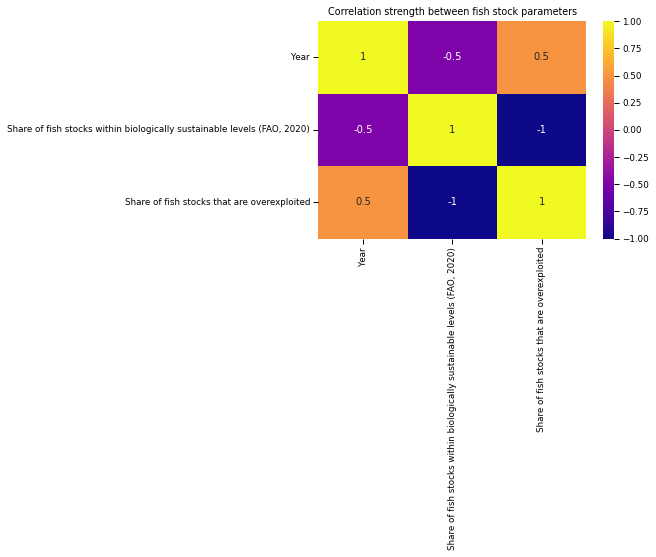

In [11]:
#Plotting a heatmap to see our correlation strength between our variables
dfc = df.copy()
dfm = df.corr()
sns.set_context("paper", rc={"axes.labelsize":5})
sns.heatmap(dfm, annot=True, cmap='plasma')
plt.title("Correlation strength between fish stock parameters")

There isn't much of a strong correlation between year and fish stocks and we could means that the overfished/sustainable fish stock remains in a reasonable amount in these regions. Again the dataframe focuses on the sea water region globally so there is a stable amount of fish stock each region can produce so that is expected. One thing we can point out is that overexploited stock is rising with a positive correlation, while the sustainable source of fish is declining in the same rate as the overexploited stock.

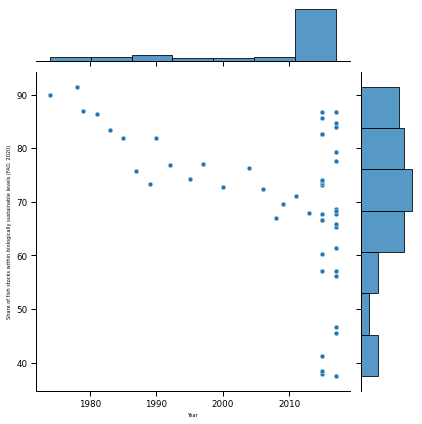

In [12]:
sns.jointplot(x='Year',y='Share of fish stocks within biologically sustainable levels (FAO, 2020)', data=df)

In this chart we can see the decline rate of sustainable fish resource over the past decades. It's interesting to see that the sustainable sources are concentrated at a higher level than before in year past 2010, which could be an indicator that other countries are actively seeking sustainble methods in catching fish from the increasing awareness of global climate change.

Text(0.5, 0, 'Changes of sustainable vs overexploited fish stocks')

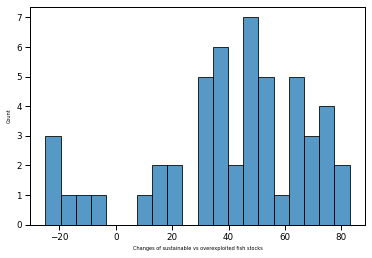

In [13]:
sns.histplot((df['Share of fish stocks within biologically sustainable levels (FAO, 2020)']
              - df['Share of fish stocks that are overexploited']), bins=20)
plt.xlabel("Changes of sustainable vs overexploited fish stocks")

The difference between share of sustainable stock and overexploited stock represent the amount of share each has in the global fish stock production. We can see that the substainbale source remains predominantly large as the changes has large count of positive values. Meaning the overexploited stock remains minimal when compared to the sustainable source. 

Another representation of our data in pairplot:

Not very useful in terms of analysis but gives us an idea of overall trend

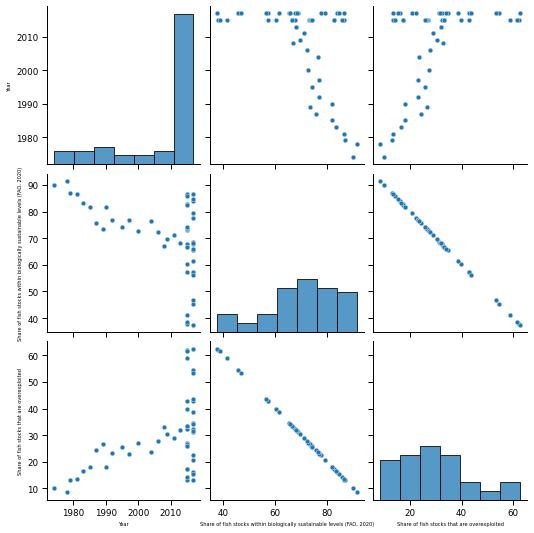

In [14]:
sns.set_context("paper", rc={"axes.labelsize":5})
sns.pairplot(df)

## Task 2: Data Analysis Pipeline

### 1. Load Data

#### Load Dataframes

Datasets were already imported in Milestone 2

#### Wrangling/Joining Dataframes

In [15]:
# Merging all our existing dataset all together

from functools import reduce

# define list of DataFrames
dfs = [aquaculture,capturedVsAquaculture, captured, seafoodConsumptionpercapita, sustainableFishStocks, globalFisheryBySector,seafoodProduction]

# merge all DataFrames into one

combined_df = reduce(lambda left,right: pd.merge(left,right,how='outer'), dfs)

# a preview of the combined_df
combined_df.head()


,Entity,Code,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)","Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited,Artisanal (small-scale commercial),Discards,Industrial (large-scale commercial),Recreational,Subsistence,Commodity Balances - Livestock and Fish Primary Equivalent - Pelagic Fish - 2763 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Crustaceans - 2765 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Cephalopods - 2766 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Demersal Fish - 2762 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Freshwater Fish - 2761 - Production - 5510 - tonnes,"Commodity Balances - Livestock and Fish Primary Equivalent - Molluscs, Other - 2767 - Production - 5510 - tonnes","Commodity Balances - Livestock and Fish Primary Equivalent - Marine Fish, Other - 2764 - Production - 5510 - tonnes"
0,Afghanistan,AFG,1969,60.0,400.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.0,NaN,NaN
1,Afghanistan,AFG,1970,60.0,400.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.0,NaN,NaN
2,Afghanistan,AFG,1971,60.0,500.0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.0,NaN,NaN
3,Afghanistan,AFG,1972,60.0,500.0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.0,NaN,NaN
4,Afghanistan,AFG,1973,60.0,500.0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.0,NaN,NaN


In [16]:
print(combined_df)

            Entity      Code  Year  Aquaculture production (metric tons)  \
0      Afghanistan       AFG  1969                                  60.0   
1      Afghanistan       AFG  1970                                  60.0   
2      Afghanistan       AFG  1971                                  60.0   
3      Afghanistan       AFG  1972                                  60.0   
4      Afghanistan       AFG  1973                                  60.0   
...            ...       ...   ...                                   ...   
16719        World  OWID_WRL  1955                                   NaN   
16720        World  OWID_WRL  1956                                   NaN   
16721        World  OWID_WRL  1957                                   NaN   
16722        World  OWID_WRL  1958                                   NaN   
16723        World  OWID_WRL  1959                                   NaN   

       Capture fisheries production (metric tons)  \
0                                 

#### Cleaning Dataframes

In [17]:
# Since the Country code, Recreational fishing, Subsistence fishing are not closely relavent to our climate change analysis, we can ditch these columns.

cleaned_dfc = combined_df.copy().drop(['Code','Recreational','Subsistence'], axis=1)

cleaned_dfc.head()

# The missing data are numeric, so it would be betweer to leave these null data as 'NaN'

,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)","Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited,Artisanal (small-scale commercial),Discards,Industrial (large-scale commercial),Commodity Balances - Livestock and Fish Primary Equivalent - Pelagic Fish - 2763 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Crustaceans - 2765 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Cephalopods - 2766 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Demersal Fish - 2762 - Production - 5510 - tonnes,Commodity Balances - Livestock and Fish Primary Equivalent - Freshwater Fish - 2761 - Production - 5510 - tonnes,"Commodity Balances - Livestock and Fish Primary Equivalent - Molluscs, Other - 2767 - Production - 5510 - tonnes","Commodity Balances - Livestock and Fish Primary Equivalent - Marine Fish, Other - 2764 - Production - 5510 - tonnes"
0,Afghanistan,1969,60.0,400.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.0,NaN,NaN
1,Afghanistan,1970,60.0,400.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.0,NaN,NaN
2,Afghanistan,1971,60.0,500.0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.0,NaN,NaN
3,Afghanistan,1972,60.0,500.0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.0,NaN,NaN
4,Afghanistan,1973,60.0,500.0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.0,NaN,NaN


#### Processing Dataframes

In [18]:
# Renaming the columns as many title are too complicated to read , mostly the fish stock parameters

df = cleaned_dfc.rename(columns={'Aquaculture production (metric tons)': 'Aquaculture production', 'Capture fisheries production (metric tons)': 'Capture fisheries production'})
df = df.rename(columns={'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)': 'Sea food supply', 'Share of fish stocks within biologically sustainable levels (FAO, 2020)': 'Sustainable fish stock share'})
df = df.rename(columns={'Share of fish stocks that are overexploited': 'Overexploited fish stock share', 'Artisanal (small-scale commercial)': 'Artisanal fisheries'})
df = df.rename(columns={'Discards': 'Discards portion', 'Commodity Balances - Livestock and Fish Primary Equivalent - Pelagic Fish - 2763 - Production - 5510 - tonnes': 'Pelagic Fish production'})
df = df.rename(columns={'Commodity Balances - Livestock and Fish Primary Equivalent - Crustaceans - 2765 - Production - 5510 - tonnes': 'Crustaceans production', 'Commodity Balances - Livestock and Fish Primary Equivalent - Cephalopods - 2766 - Production - 5510 - tonnes': 'Cephalopods production'})
df = df.rename(columns={'Commodity Balances - Livestock and Fish Primary Equivalent - Demersal Fish - 2762 - Production - 5510 - tonnes': 'Demersal Fish production', 'Commodity Balances - Livestock and Fish Primary Equivalent - Freshwater Fish - 2761 - Production - 5510 - tonnes': 'Freshwater Fish production'})
df = df.rename(columns={'Commodity Balances - Livestock and Fish Primary Equivalent - Molluscs, Other - 2767 - Production - 5510 - tonnes': 'Molluscs and other production', 'Commodity Balances - Livestock and Fish Primary Equivalent - Marine Fish, Other - 2764 - Production - 5510 - tonnes': 'Marine Fish and other production'})
df = df.rename(columns={'Industrial (large-scale commercial)':'Industrial fisheries'})
df.head()

,Entity,Year,Aquaculture production,Capture fisheries production,Sea food supply,Sustainable fish stock share,Overexploited fish stock share,Artisanal fisheries,Discards portion,Industrial fisheries,Pelagic Fish production,Crustaceans production,Cephalopods production,Demersal Fish production,Freshwater Fish production,Molluscs and other production,Marine Fish and other production
0,Afghanistan,1969,60.0,400.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.0,NaN,NaN
1,Afghanistan,1970,60.0,400.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.0,NaN,NaN
2,Afghanistan,1971,60.0,500.0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.0,NaN,NaN
3,Afghanistan,1972,60.0,500.0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.0,NaN,NaN
4,Afghanistan,1973,60.0,500.0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.0,NaN,NaN


## Task 3: Method Chaining

In [19]:
import project_functions_nick as pn

# Export merged table
combined_df.to_csv('../data/processed/combined_nick.csv', index=False)

In [20]:
cleaned_dataset = pn.load_and_process("../data/processed/combined_nick.csv")
cleaned_dataset

cleaned_dataset.to_csv('../data/processed/processed_nick.csv', index=False)

# The result:

## Task 4: Data Analysis

See group notebook.